In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
#1 Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.
crypto_raw_df = pd.read_csv(Path('crypto_data.csv'))

crypto_raw_df.head(5)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#2 Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. 
#  Once you have done this, drop the IsTrading column from the dataframe.

traded_cryptos_df = crypto_raw_df.loc[crypto_raw_df["IsTrading"]==True]
traded_cryptos_df = traded_cryptos_df.drop(columns=['Unnamed: 0','IsTrading'],axis=1)
traded_cryptos_df.head(5)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0


In [4]:
#3 Remove all rows that have at least one null value.

traded_cryptos_df = traded_cryptos_df.dropna(axis=0)

In [5]:
#4 Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

mined_cryptos_df = traded_cryptos_df.loc[traded_cryptos_df.TotalCoinsMined > 0]

In [6]:
# 5. In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. 
#    Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.

mined_cryptos_df = mined_cryptos_df.drop(columns='CoinName',axis=1)


In [7]:
#6 Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, 
#  into numerical data. To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and 
#  columns of your dataset now. How did they change?

dummy_df = pd.get_dummies(mined_cryptos_df, columns=['Algorithm', 'ProofType'])
len(dummy_df.columns)

#Data changed in that Algorithm and ProofType values rows became columns

98

In [8]:
#7 Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.

scaler = StandardScaler()
scaled_dummy_df = scaler.fit_transform(dummy_df)


In [9]:
# Creating dummy variables above dramatically increased the number of features in your dataset. 
# Perform dimensionality reduction with PCA. Rather than specify the number of principal components 
# when you instantiate the PCA model, it is possible to state the desired explained variance.

pca = PCA(n_components = 5)

pca_fit_df = pca.fit_transform(scaled_dummy_df)

crypto_pca_df = pd.DataFrame(data=pca_fit_df, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"])
crypto_pca_df.head() 

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-0.333428,1.052067,-0.587382,-0.012383,0.001461
1,-0.316742,1.052343,-0.587864,-0.012453,0.001417
2,2.309990,1.679706,-0.664724,0.010199,-0.036701
3,-0.147446,-1.354995,0.213387,0.015273,-0.003509
4,-0.148862,-2.094656,0.436414,0.013381,-0.020292


In [10]:
pca.explained_variance_ratio_

array([0.02793131, 0.02140599, 0.02050378, 0.02044492, 0.02044375])

In [11]:
# For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that 
# will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 
# 80 principal components or 3. For this project, preserve 90% of the explained variance in dimensionality 
# reduction. How did the number of the features change?

In [12]:
# Preserve 90% of the explained variance in dimensionality reduction using PCA
pca2 = PCA(n_components=.90)

crypto_pca = pca2.fit_transform(scaled_dummy_df)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -3.14347031e-16, -9.12135823e-16,  2.51599752e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         1.40899850e-16, -6.63562740e-16,  1.76363717e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -4.28651623e-14,  1.52581172e-14,  2.33406076e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         6.43792050e-15,  5.39438665e-14,  4.08239752e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         6.40788354e-16,  1.39171221e-15, -1.63325938e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         3.55437290e-16, -2.85851680e-15,  1.49183539e-15]])

In [13]:
# Transform PCA data to a DataFrame
transformed_crypto_pca = pd.DataFrame(data=crypto_pca)
transformed_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,9.543357e-15,2.584461e-14,2.783272e-12,-0.007129,-1.319756,-0.051813,...,2.337319e-15,5.504297e-16,-9.521754e-15,-2.223528e-15,3.187960e-15,4.367153e-16,1.859567e-15,-3.143470e-16,-9.121358e-16,2.515998e-15
1,-0.318434,1.032331,-0.591126,0.001386,9.454226e-15,2.583214e-14,2.760785e-12,-0.007739,-1.322514,-0.056674,...,2.318559e-15,1.463161e-16,-8.740104e-15,-9.796321e-16,2.067953e-15,7.849041e-16,2.400291e-15,1.408998e-16,-6.635627e-16,1.763637e-15
2,2.305468,1.656383,-0.683617,0.004731,2.129524e-14,3.755646e-14,9.428182e-12,-0.054781,-1.542879,-0.943951,...,-4.996160e-14,-3.979802e-14,5.785993e-14,6.190230e-14,-1.359053e-14,2.676015e-14,-6.589743e-14,-4.286516e-14,1.525812e-14,2.334061e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-5.159734e-15,-9.459827e-15,-2.448600e-12,-0.002071,0.281463,0.251862,...,-9.929433e-15,-6.755996e-15,8.338135e-15,9.429897e-15,-9.793847e-15,-2.556739e-15,2.380441e-16,2.127087e-15,1.526409e-14,5.404772e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-1.570805e-14,-2.254731e-14,-3.400944e-12,0.027735,0.519099,0.188820,...,-1.350763e-14,3.594031e-14,1.063412e-13,2.051921e-15,-4.644808e-14,-2.237849e-14,1.076614e-13,4.624185e-14,1.636071e-13,7.382433e-14


In [14]:
pca.explained_variance_ratio_

array([0.02793131, 0.02140599, 0.02050378, 0.02044492, 0.02044375])

([<matplotlib.axis.XTick at 0x23bcb82a8b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

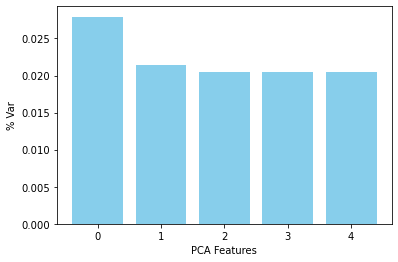

In [15]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='skyblue')
plt.xlabel('PCA Features')
plt.ylabel('% Var')
plt.xticks(features)

In [16]:
# Number of features
len(transformed_crypto_pca.columns)

74

In [17]:
# Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. 
# In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. 
# Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

tsne = TSNE(learning_rate=35)

In [18]:
tsne_features = tsne.fit_transform(transformed_crypto_pca)
tsne_features.shape

(532, 2)

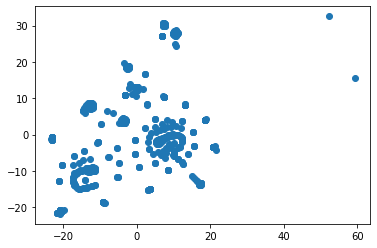

In [19]:
x = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(x, y)
plt.show()

C:\Users\aslig\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


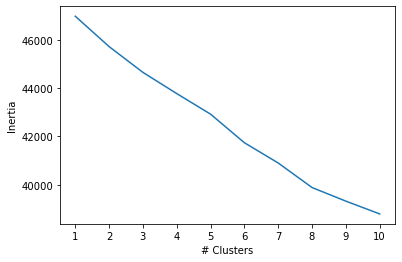

In [20]:
#Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10. Determine, if possible, where the elbow of the plot is, 
#and at which value of k it appears.

inertia_container = []
l_range = list(range(1, 11))

for i in l_range:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(transformed_crypto_pca)
    inertia_container.append(km.inertia_)

# Elbow Curve
elbow_data = {"K": l_range, "Inertia": inertia_container}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['K'], df_elbow['Inertia'])
plt.xticks(range(1,11))
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
# There isn't a discernable elbow in the graph.  THe K-value beyond changes, albiet a very small amount. 